## Proyecto Final
### Análisis Exploratorio de Datos
### Luis Fernando Izquierdo Berdugo


## Introducción

Este proyecto tiene como objetivo realizar un análisis exploratorio de datos sobre un conjunto de información relacionado con características físicas de abulones (abalone), un molusco marino. El análisis se enfoca en comprender la estructura interna de los datos, identificar relaciones entre variables y explorar su potencial predictivo con respecto a la edad del abulón, estimada mediante la variable `Rings`.

Para ello, se llevan a cabo diversas técnicas estadísticas y de aprendizaje automático, tales como análisis de correlación, reducción de dimensionalidad mediante PCA (Análisis de Componentes Principales) y KPCA (PCA con kernel), análisis de tendencia al agrupamiento, y modelos predictivos supervisados como k-Vecinos más Cercanos (k-Nearest Neighbors, kNN).

El proyecto también contempla un proceso riguroso de limpieza de datos, cálculo de valores faltantes, estandarización y visualización, con el fin de obtener una mejor comprensión de las variables y preparar el conjunto de datos para que el modelado sea eficiente.

Este trabajo busca no sólo aplicar técnicas vistas en clase, sino también desarrollar una interpretación crítica de los resultados obtenidos, reflexionando sobre su significado y utilidad en un contexto real.

## Implementación
### Instalación e importación de las librerías necesarias

In [96]:
!pip3 install ydata-profiling pyclustertend seaborn numpy pandas matplotlib scikit-learn umap-learn

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from ydata_profiling import ProfileReport
from pyclustertend import vat, ivat, hopkins
from IPython.display import display, HTML
import warnings
import umap

# Configuración de visualización
pd.set_option('display.max_columns', None)
%matplotlib inline
warnings.filterwarnings('ignore')

### Carga del conjunto de datos

In [98]:
df = pd.read_csv('abalone_new.csv')
df.head()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings,Maturity_Level,Random_Index,Biological_Variation
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,aged,16,1.07198
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,mature,27,-0.25318
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,mature,72,-1.32416
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,mature,30,-1.04046
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,mature,89,-0.51718


### Análisis exploratorio del dataset
#### Información general del dataset

In [99]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4595 entries, 0 to 4594
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sex                   4595 non-null   object 
 1   Length                4177 non-null   float64
 2   Diameter              4595 non-null   float64
 3   Height                4177 non-null   float64
 4   Whole                 4177 non-null   float64
 5   Shucked               4595 non-null   float64
 6   Viscera               4595 non-null   float64
 7   Shell                 4595 non-null   float64
 8   Rings                 4595 non-null   int64  
 9   Maturity_Level        4595 non-null   object 
 10  Random_Index          4595 non-null   int64  
 11  Biological_Variation  4595 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 430.9+ KB


(4595, 12)

#### Estadísticas descriptivas para columnas numéricas

In [100]:
#Se hace un describe solamente para las columnas numéricas
df.describe()

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings,Random_Index,Biological_Variation
count,4177.000000,4595.000000,4177.000000,4177.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000
mean,0.522819,0.407657,0.139251,0.825430,0.358485,0.180565,0.238544,9.928836,49.670947,0.007672
std,0.120885,0.099393,0.042064,0.490611,0.220490,0.109504,0.138831,3.236160,28.573175,1.004244
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,1.000000,-3.718530
25%,0.450000,0.350000,0.115000,0.437000,0.187000,0.093500,0.130000,8.000000,25.000000,-0.665730
50%,0.545000,0.425000,0.140000,0.800000,0.335500,0.170000,0.233500,9.000000,49.000000,0.013340
75%,0.615000,0.480000,0.165000,1.150000,0.500750,0.253000,0.328500,11.000000,75.000000,0.691110
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,99.000000,3.389880


#### Verificar valores nulos

In [101]:
df.isnull().sum()

Sex                       0
Length                  418
Diameter                  0
Height                  418
Whole                   418
Shucked                   0
Viscera                   0
Shell                     0
Rings                     0
Maturity_Level            0
Random_Index              0
Biological_Variation      0
dtype: int64

#### Verificar duplicados

In [102]:
df.duplicated().sum()

np.int64(418)

#### Distribución de las variables categóricas Maturity_Level y Sex

In [103]:
df['Maturity_Level'].value_counts()

Maturity_Level
mature    2930
aged      1583
young       82
Name: count, dtype: int64

In [104]:
df['Sex'].value_counts()

Sex
M    1685
I    1476
F    1434
Name: count, dtype: int64

#### Matriz de correlación (solo columnas numéricas)

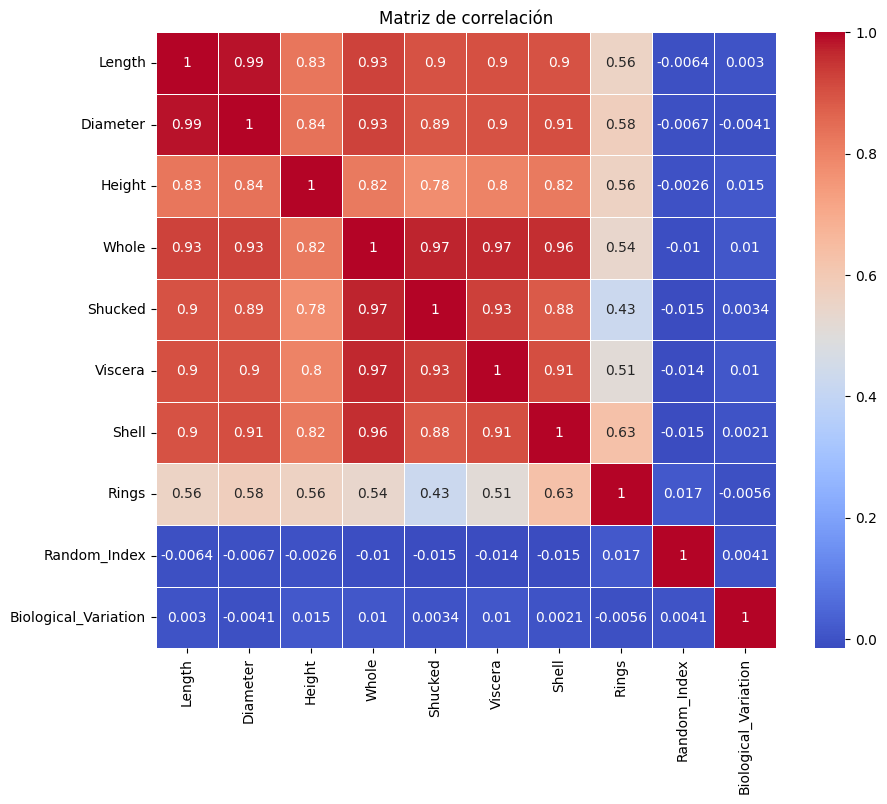

In [105]:
correlation = df.corr(numeric_only=True)
# Visualización de la correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

En esta matriz de correlación se puede observar que:
- Se debe eliminar la variable `Rings`, esto debido a que es la variable objetivo y sería redundante incluirla
- Las variables `Random_Index`y `Biological_Variation` no están relacionadas con las demás, al tener un valor tan bajo en todas las relaciones (excepto consigo misma) se entiende que no son relevantes para el modelo y se pueden eliminar

### Limpieza de Dataset
#### Detección y manejo de valores faltantes
Primero se guardaran lo tipos de datos originales de las columnas con valores faltantes, estas se identificaron previamente al buscar los valores nulos.

In [106]:
original_dtypes = df[['Length', 'Height', 'Whole']].dtypes
original_dtypes


Length    float64
Height    float64
Whole     float64
dtype: object

Se imputan los valores faltantes con la media de cada columna

In [107]:
for col in ['Length', 'Height', 'Whole']:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)


Se convierte de nuevo al tipo original que se había guardado y se redondea a 5 decimales

In [108]:
for col in ['Length', 'Height', 'Whole']:
    df[col] = df[col].astype(original_dtypes[col])  # convertir al tipo original
    df[col] = df[col].round(5)                      # redondear


Verificamos que ya no haya valores faltantes en las columnas

In [109]:
df[['Length', 'Height', 'Whole']].isnull().sum()

Length    0
Height    0
Whole     0
dtype: int64

#### Eliminación de columnas con varianza = 0
Si una columna tiene su varianza = 0, significa que tiene el mismo valor en todas sus filas, lo cual no aporta en nada al análisis.

Primero se crea un nuevo dataframe solo con las columnas numéricas

In [110]:
numeric_df = df.select_dtypes(include=['number'])

Se sacan las varianzas del nuevo dataframe

In [111]:
varianzas = numeric_df.var()
varianzas

Length                    0.013283
Diameter                  0.009879
Height                    0.001608
Whole                     0.218798
Shucked                   0.048616
Viscera                   0.011991
Shell                     0.019274
Rings                    10.472732
Random_Index            816.426311
Biological_Variation      1.008505
dtype: float64

Como se puede observar, no hay varianzas iguales a cero por lo cual no se eliminará ninguna columna.

#### Detección y remoción de outliers

Un outlier es un valor que se encuentra muy alejado del resto de los datos, esto puede ser por un error de captura o un caso muy extremo.

Para detectar los outliers, se utilizará el rango intecuartílico (IQR), este mide la dispersión del 50% central de los datos.

IQR = Tercer Cuartil - Primer Cuartil

Ya con esto se generan los límites inferior o superior.

Límite inferior = Q1 - 1.5 * IQR\
Límite superior = Q3 + 1.5 * IQR

Siendo cualquier valor por fuera de estos límites un outlier.

In [112]:
def detectar_outliers_iqr(df, columnas):
    outliers = pd.DataFrame()
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers[col] = ~df[col].between(lower, upper)  # True si es outlier
    return outliers

In [113]:
outliers_df = detectar_outliers_iqr(df, numeric_df)


Se buscan los outliers por fila y se guarda el valor en una columa `outliers_count`

In [114]:
df['outliers_count'] = outliers_df.sum(axis=1)

Se dejan únicamente las filas cuyo `outliers_count` es igual a cero y se borra esta columna.

In [115]:
df = df[df['outliers_count'] == 0].drop(columns='outliers_count')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4094 entries, 0 to 4594
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sex                   4094 non-null   object 
 1   Length                4094 non-null   float64
 2   Diameter              4094 non-null   float64
 3   Height                4094 non-null   float64
 4   Whole                 4094 non-null   float64
 5   Shucked               4094 non-null   float64
 6   Viscera               4094 non-null   float64
 7   Shell                 4094 non-null   float64
 8   Rings                 4094 non-null   int64  
 9   Maturity_Level        4094 non-null   object 
 10  Random_Index          4094 non-null   int64  
 11  Biological_Variation  4094 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 415.8+ KB


#### Eliminación de valores duplicados

In [116]:
duplicados = df.duplicated().sum()
print(f"Valores duplicados: {duplicados}")

Valores duplicados: 372


In [117]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3722 entries, 0 to 4176
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sex                   3722 non-null   object 
 1   Length                3722 non-null   float64
 2   Diameter              3722 non-null   float64
 3   Height                3722 non-null   float64
 4   Whole                 3722 non-null   float64
 5   Shucked               3722 non-null   float64
 6   Viscera               3722 non-null   float64
 7   Shell                 3722 non-null   float64
 8   Rings                 3722 non-null   int64  
 9   Maturity_Level        3722 non-null   object 
 10  Random_Index          3722 non-null   int64  
 11  Biological_Variation  3722 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 378.0+ KB


#### Guardar el dataset procesado

In [118]:
df.to_csv('abalone_processed.csv', index=False)

### Procesamiento del Dataset

In [119]:
df_processed = pd.read_csv('abalone_processed.csv')

### Análisis Exploratorio del dataset abalone_processed.csv

#### Información general

In [120]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sex                   3722 non-null   object 
 1   Length                3722 non-null   float64
 2   Diameter              3722 non-null   float64
 3   Height                3722 non-null   float64
 4   Whole                 3722 non-null   float64
 5   Shucked               3722 non-null   float64
 6   Viscera               3722 non-null   float64
 7   Shell                 3722 non-null   float64
 8   Rings                 3722 non-null   int64  
 9   Maturity_Level        3722 non-null   object 
 10  Random_Index          3722 non-null   int64  
 11  Biological_Variation  3722 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 349.1+ KB


#### Estadísticas descriptivas numéricas

In [121]:
df_processed.describe()

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings,Random_Index,Biological_Variation
count,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000
mean,0.522976,0.406699,0.137931,0.797856,0.349560,0.174986,0.227444,9.457281,49.827781,0.011491
std,0.106361,0.090174,0.033857,0.430278,0.201404,0.100503,0.121584,2.306046,28.660758,0.976336
min,0.245000,0.165000,0.050000,0.063500,0.024500,0.008000,0.015000,4.000000,1.000000,-2.694780
25%,0.455000,0.345000,0.115000,0.449500,0.186000,0.092625,0.130000,8.000000,25.000000,-0.659925
50%,0.530000,0.420000,0.139625,0.808000,0.328500,0.165750,0.221500,9.000000,49.000000,0.013165
75%,0.605000,0.475000,0.160000,1.105750,0.493000,0.244500,0.315000,11.000000,75.000000,0.691475
max,0.760000,0.600000,0.240000,2.087000,0.960000,0.492000,0.625000,15.000000,99.000000,2.710400


#### Verificar valores nulos

In [122]:
df_processed.isnull().sum()

Sex                     0
Length                  0
Diameter                0
Height                  0
Whole                   0
Shucked                 0
Viscera                 0
Shell                   0
Rings                   0
Maturity_Level          0
Random_Index            0
Biological_Variation    0
dtype: int64

#### Verificar duplicados

In [123]:
df_processed.duplicated().sum()

np.int64(0)

#### Distribución de variables categóricas

In [124]:
df_processed['Sex'].value_counts()

Sex
M    1345
I    1229
F    1148
Name: count, dtype: int64

In [125]:
df_processed['Maturity_Level'].value_counts()

Maturity_Level
mature    2584
aged      1117
young       21
Name: count, dtype: int64

#### Matriz de correlación

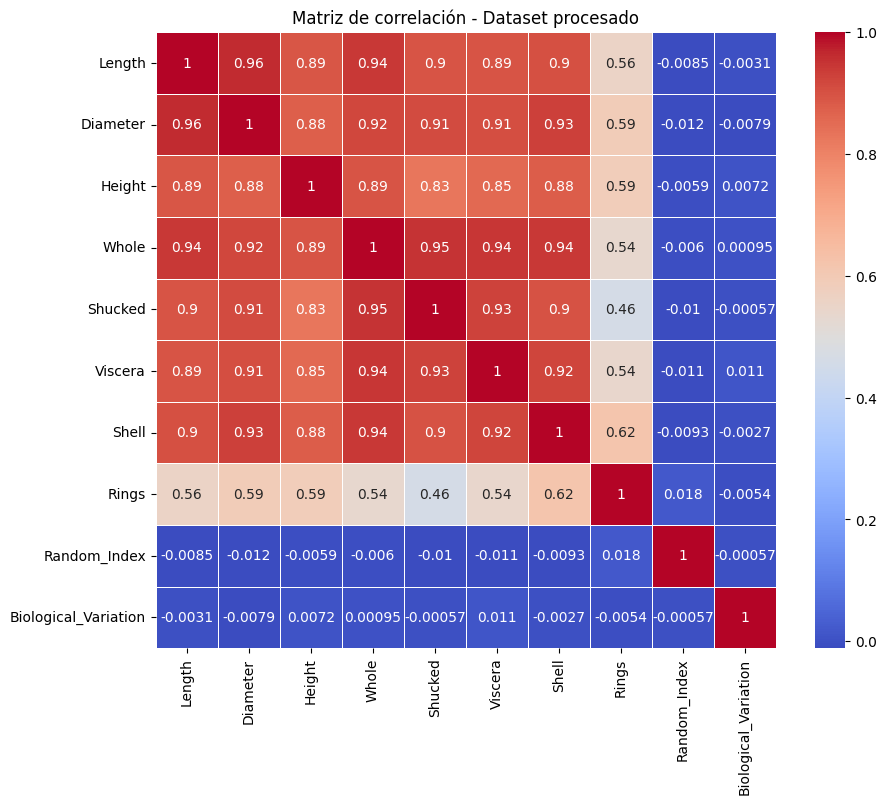

In [126]:
correlation_matrix = df_processed.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de correlación - Dataset procesado")
plt.show()

### Análisis de Correlaciones

En el heatmap se puede observar que básicamente todas las variables tienen relación entre si, únicamente `Random_Index` y `Biological_Variation` tienen valores muy bajos con todas las demás variables, lo cual puede significar que no son relevantes y se procederá a eliminarlas.

In [127]:
df_processed.drop(columns=['Random_Index','Biological_Variation', 'Rings'], inplace=True)
df_processed.head()


,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Maturity_Level
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,aged
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,mature
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,mature
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,mature
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,mature


Y se genera de nuevo el heatmap

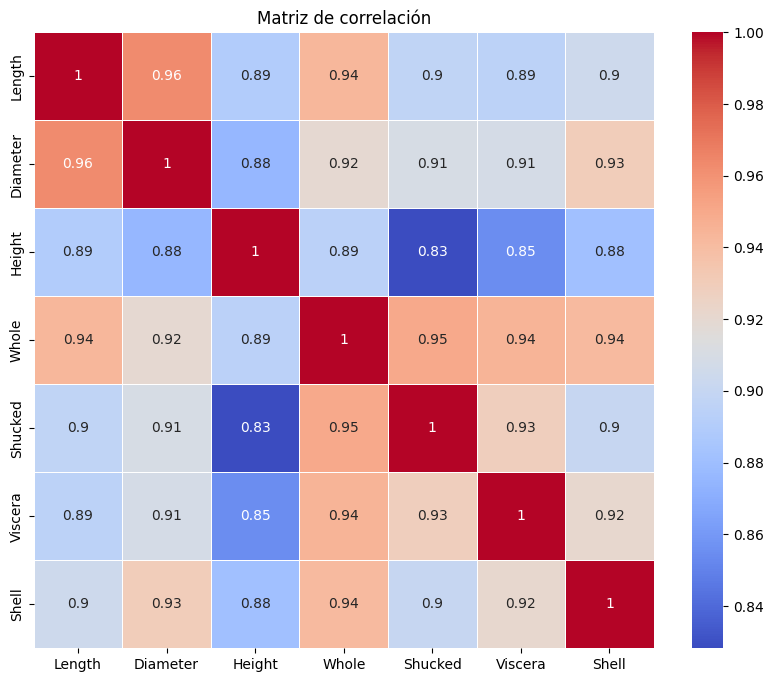

In [128]:
correlation_matrix = df_processed.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()

### Análisis de tendencia de Clustering

Primero se seleccionarán solo las columnas numéricas y se normalizarán los datos

In [130]:
X = df_processed.select_dtypes(include=['number'])
# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [131]:
hopkins_stat = hopkins(X_scaled, X_scaled.shape[0])
print("Hopkins Statistic:", hopkins_stat)

Hopkins Statistic: 0.0884296880154619


Con un valor estadístico de Hopkins tan bajo, se puede saber que el dataset no tiene una tendencia natural a formar clusters.

#### Evaluación con VAT e iVAT

<Figure size 600x600 with 0 Axes>

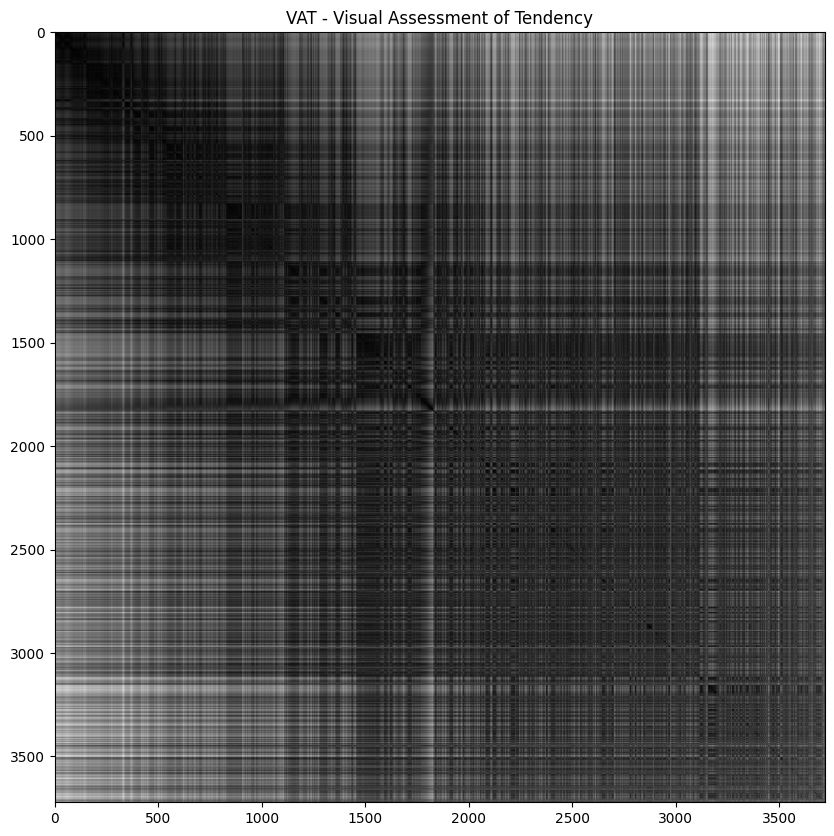

In [132]:
# VAT
plt.figure(figsize=(6, 6))
vat(X_scaled)
plt.title("VAT - Visual Assessment of Tendency")
plt.show()

El VAT está muy difuso y sin bloques definidos, de igual manera, no se observan cuadrados bien marcados en la diagonal (lo cual indica agrupaciones naturales), por lo cual, hay una ausencia clara de clusters y los datos parecen distribuidos de manera continua y uniforme

<Figure size 600x600 with 0 Axes>

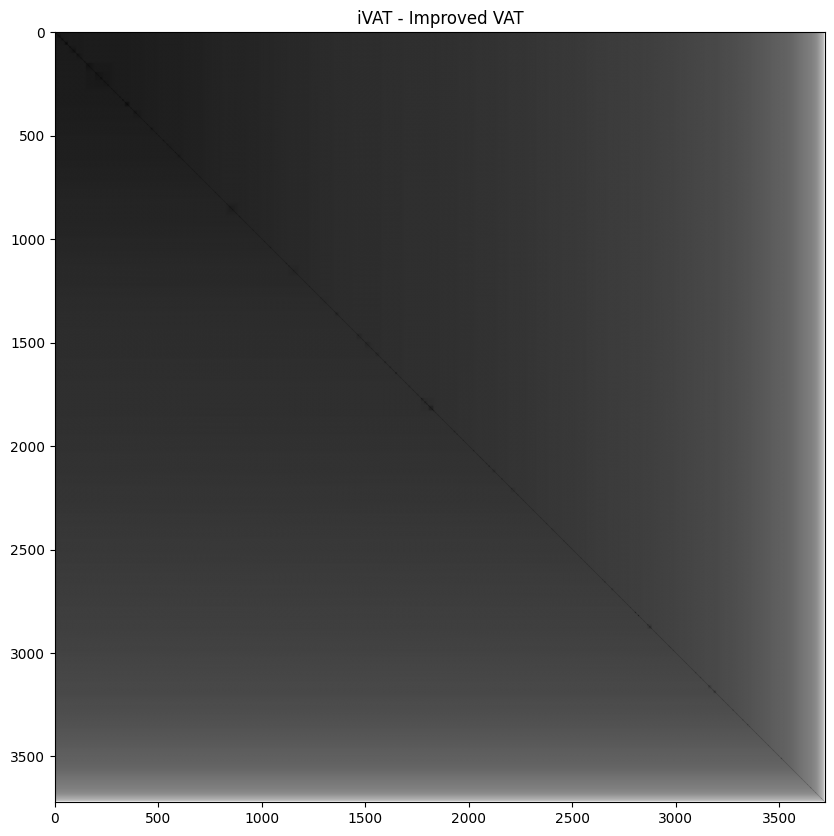

In [133]:
# iVAT
plt.figure(figsize=(6, 6))
ivat(X_scaled)
plt.title("iVAT - Improved VAT")
plt.show()

En el iVAT se pueden observar bloques diagonales suaves, lo cual podría sugerir cierta agrupación, pero el resultado es demasiado leve.


### Análisis de reducción de bidimensionalidad (PCA)

#### Normalización de los datos

In [134]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

#### Cálculo de varianza explicada

In [135]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

#### Gráfico de varianza explicada acumulada

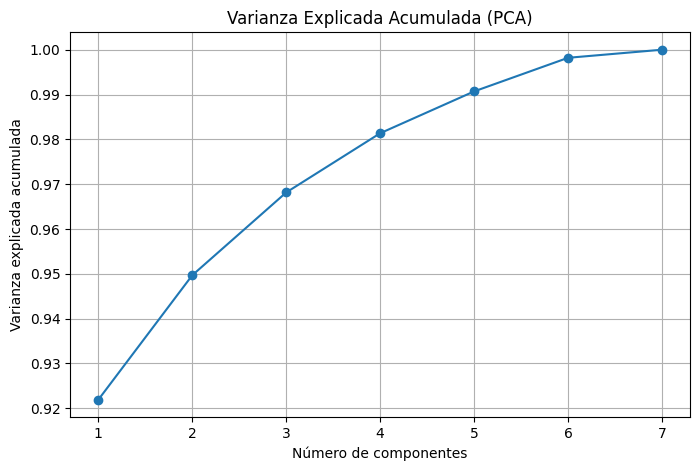

In [136]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.title("Varianza Explicada Acumulada (PCA)")
plt.grid(True)
plt.show()

#### Heatmap de los componentes

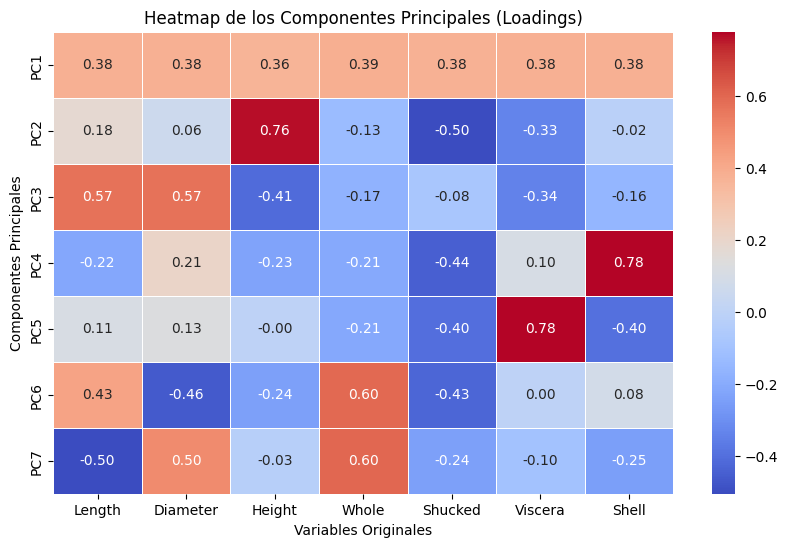

In [137]:
pca_components_df = pd.DataFrame(
    data=pca.components_,
    columns=X.columns,
    index=[f'PC{i+1}' for i in range(len(X.columns))]
)

plt.figure(figsize=(10, 6))
sns.heatmap(pca_components_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap de los Componentes Principales (Loadings)")
plt.xlabel("Variables Originales")
plt.ylabel("Componentes Principales")
plt.show()

- PC1: 
    - Tiene valores similares (~0.38) en todas las variables, lo que sugiere que representa una combinación promedio de todas las variables.
- PC2: 
    - Altamente influido por `Height` (0.76): Este componente está fuertemente relacionado con esa única variable.
    - Influencias negativas en `Shucked` y `Whole` sugieren que PC2 contrasta altura con peso.
- PC3:
    - Alta carga en `Length` y `Diameter` (~0.57), pero carga negativa en `Height`.
    - Representa probablemente la forma del abulón: largo y ancho vs. alto.
- PC4:
    - Alta carga positiva en `Shell` (0.78), negativa en `Shucked`, `Whole`.
    - Posiblemente refleja el peso de la concha frente a los tejidos blandos.
- PC5:
    - Alta carga en `Viscera` (0.78), pero con menor peso en otras.
    - Está dominado por peso de vísceras, con poca relación con el resto.

- PC6: Positivo en `Whole` y `Length`, negativo en `Diameter` y `Shucked`.
- PC7: Negativo en `Length`, positivo en `Diameter`, lo cual sugiere formas específicas no captadas por PC1–PC5.

#### Verificación de valores atípicos

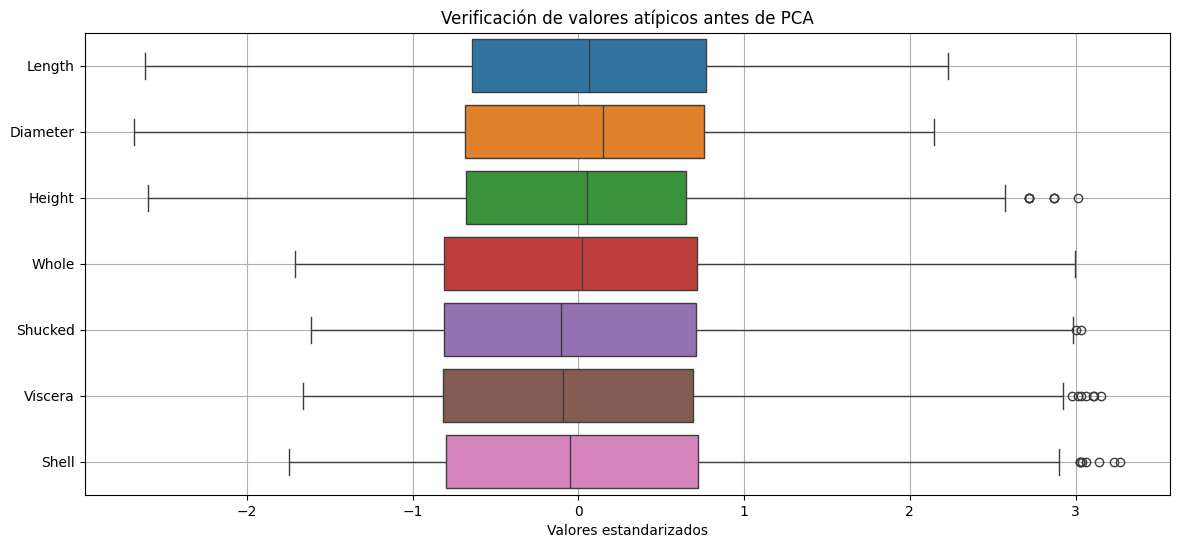

In [138]:
X_scaled_df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

plt.figure(figsize=(14, 6))
sns.boxplot(data=X_scaled_df, orient="h")
plt.title("Verificación de valores atípicos antes de PCA")
plt.xlabel("Valores estandarizados")
plt.grid(True)
plt.show()

Se observa que `Height`, `Shucked`, `Viscera` y `Shell` presentan valores atípicos, sin embargo no parecen ser muchos casos y tampoco extremos, por lo cual se puede continuar sin tener que hacer un tratamiento (ya que se ejecutó previamente).

#### PCA

In [139]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

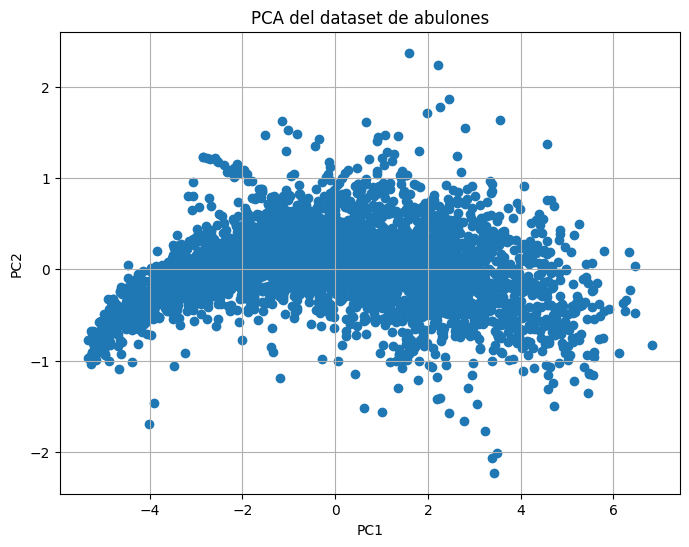

In [140]:
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA del dataset de abulones')
plt.grid(True)
plt.show()

#### KPCA

In [141]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1, fit_inverse_transform=True)
X_kpca = kpca.fit_transform(X_scaled)

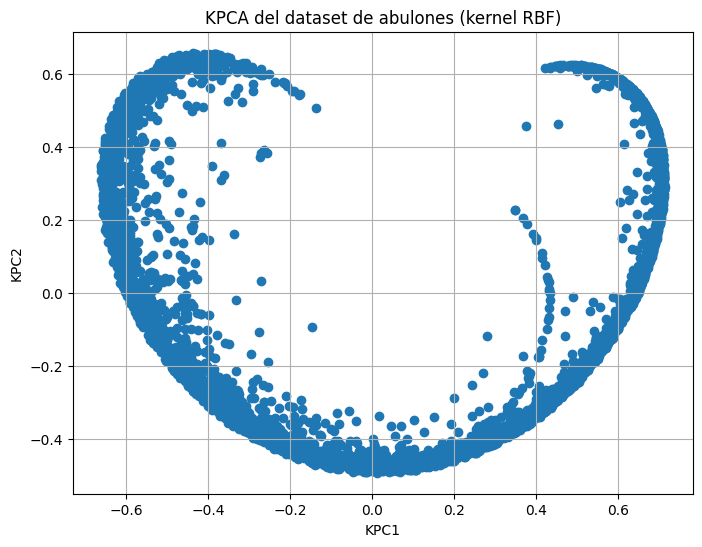

In [142]:
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1])
plt.xlabel("KPC1")
plt.ylabel("KPC2")
plt.title("KPCA del dataset de abulones (kernel RBF)")
plt.grid(True)
plt.show()

#### KPCA con Kernel Polinomial

In [143]:
kpca_poly = KernelPCA(n_components=2, kernel='poly', degree=3)
X_kpca_poly = kpca_poly.fit_transform(X_scaled)

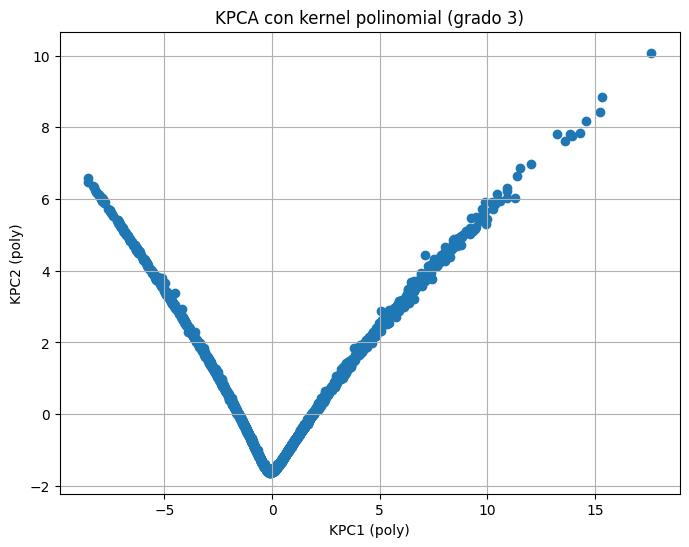

In [144]:
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca_poly[:, 0], X_kpca_poly[:, 1])
plt.xlabel("KPC1 (poly)")
plt.ylabel("KPC2 (poly)")
plt.title("KPCA con kernel polinomial (grado 3)")
plt.grid(True)
plt.show()

#### Espacio reconstruido después de KPCA

In [145]:
X_reconstructed = kpca.inverse_transform(X_kpca)

In [146]:
df_original = pd.DataFrame(X_scaled, columns=X.columns)
df_reconstructed = pd.DataFrame(X_reconstructed, columns=X.columns)

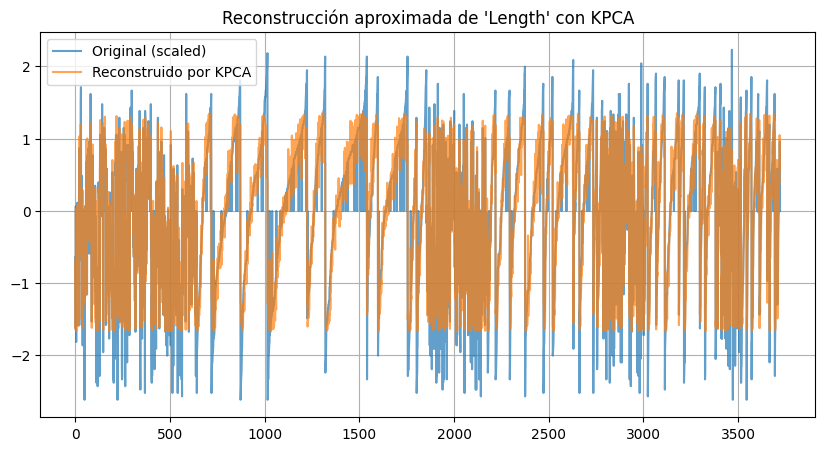

In [147]:
plt.figure(figsize=(10, 5))
plt.plot(df_original['Length'], label='Original (scaled)', alpha=0.7)
plt.plot(df_reconstructed['Length'], label='Reconstruido por KPCA', alpha=0.7)
plt.title("Reconstrucción aproximada de 'Length' con KPCA")
plt.legend()
plt.grid(True)
plt.show()

KPCA no logra reconstruir perfectamente, pero logra aproximar la variable `Length` con una fidelidad razonable, lo cual sugiere que los componentes extraídos sí contienen información útil sobre la estructura del dato original. Esto valida parcialmente el uso de KPCA como técnica de reducción de dimensionalidad para posterior análisis (como visualización o entrada a modelos). La discrepancia es mayor en los extremos, lo que indica que KPCA captura mejor los patrones frecuentes y no tanto los valores atípicos.

#### Comparaciones

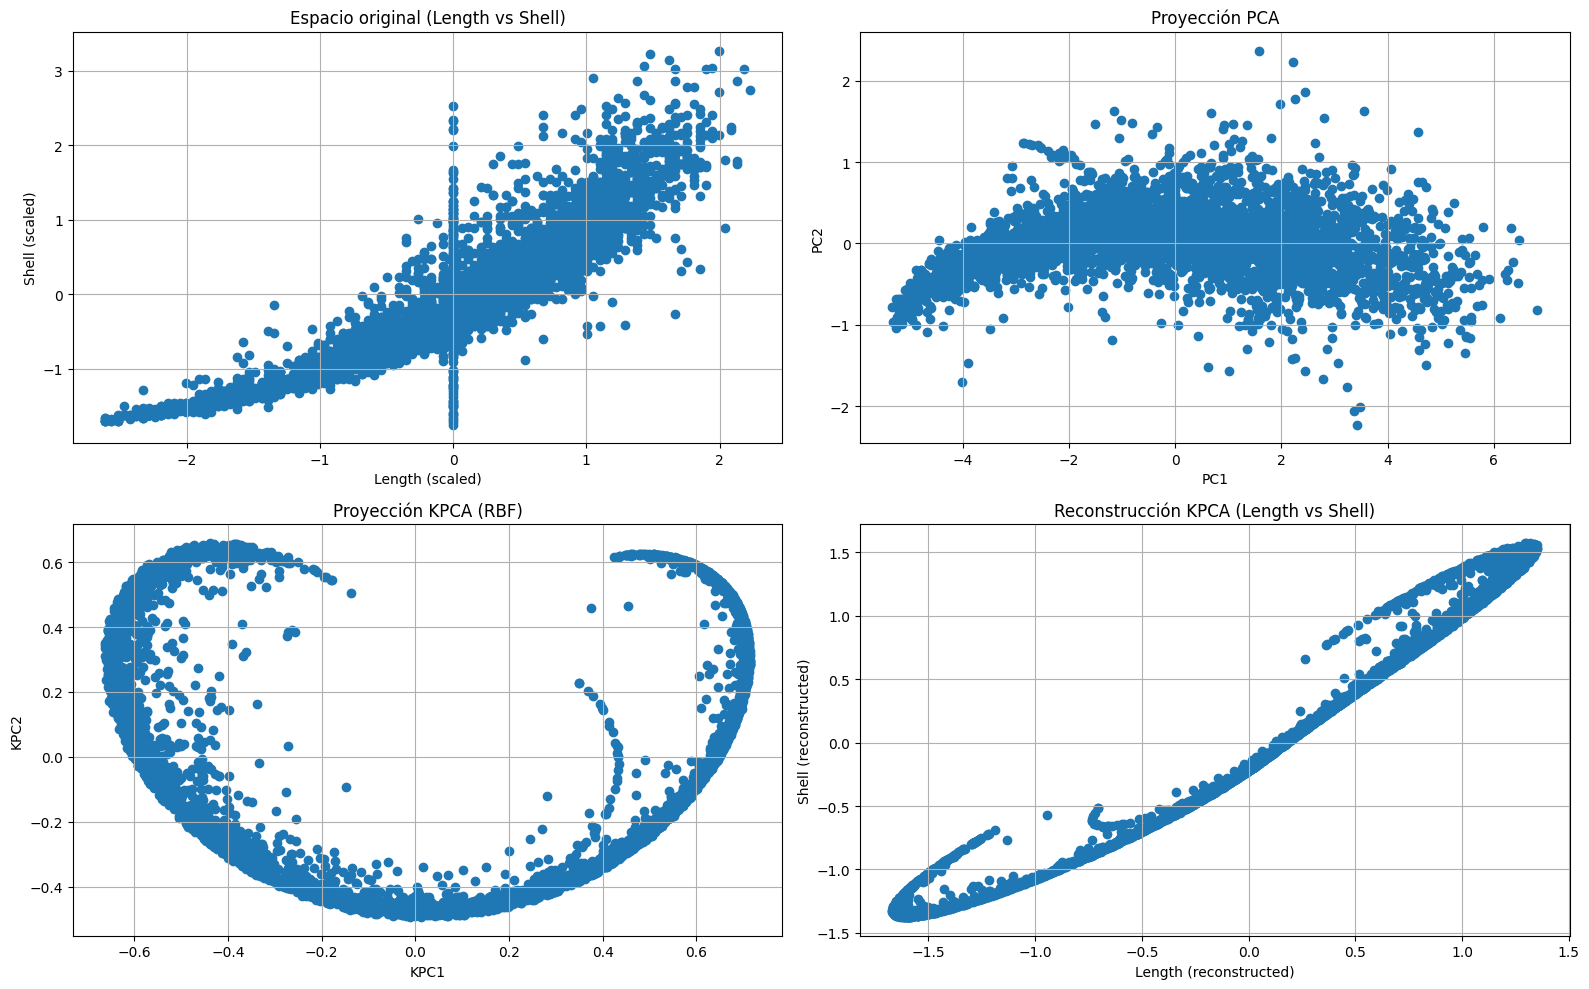

In [148]:
import matplotlib.pyplot as plt

# Crear DataFrames base
df_original = pd.DataFrame(X_scaled, columns=X.columns)
df_pca = pd.DataFrame(principal_components, columns=["PC1", "PC2"])
df_kpca = pd.DataFrame(X_kpca, columns=["KPC1", "KPC2"])
df_reconstructed = pd.DataFrame(X_reconstructed, columns=X.columns)

# Gráfico comparativo
plt.figure(figsize=(16, 10))

# 1. Espacio original
plt.subplot(2, 2, 1)
plt.scatter(df_original["Length"], df_original["Shell"])
plt.title("Espacio original (Length vs Shell)")
plt.xlabel("Length (scaled)")
plt.ylabel("Shell (scaled)")
plt.grid(True)

# 2. Proyección PCA
plt.subplot(2, 2, 2)
plt.scatter(df_pca["PC1"], df_pca["PC2"])
plt.title("Proyección PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)

# 3. Proyección KPCA
plt.subplot(2, 2, 3)
plt.scatter(df_kpca["KPC1"], df_kpca["KPC2"])
plt.title("Proyección KPCA (RBF)")
plt.xlabel("KPC1")
plt.ylabel("KPC2")
plt.grid(True)

# 4. Reconstrucción después de KPCA
plt.subplot(2, 2, 4)
plt.scatter(df_reconstructed["Length"], df_reconstructed["Shell"])
plt.title("Reconstrucción KPCA (Length vs Shell)")
plt.xlabel("Length (reconstructed)")
plt.ylabel("Shell (reconstructed)")
plt.grid(True)

plt.tight_layout()
plt.show()


### Proyección con UMAP

UMAP asume que los datos originales están curveados en un espacio de alta dimensión (como se observa en el KPCA).

Este construye un grafo basado en los nearest neighbors de cada punto (usa distancia k-nearest neighbors) y lo proyecta en un espacio de baja dimensión preservando la estructura local y global.

Este es mejor que t-SNE e isomap porque es más rápido y mejor para datasets grandes, así como mantiene la estructura local y global.

In [149]:
# Seleccionar variables numéricas y estandarizar
X = df_processed.select_dtypes(include=["number"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [150]:
# Aplicar UMAP
umap_model = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)


In [151]:
# Crear DataFrame de la proyección
df_umap = pd.DataFrame(X_umap, columns=["UMAP1", "UMAP2"])
df_umap["Maturity_Level"] = df_processed["Maturity_Level"]

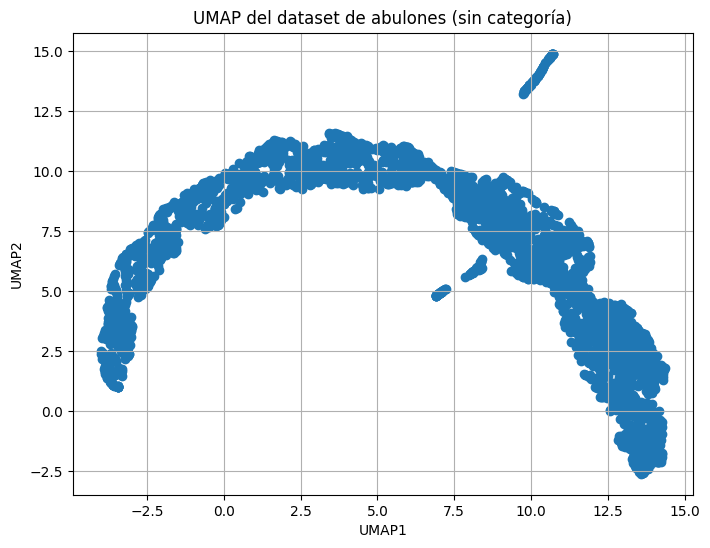

In [152]:
# Graficar
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1])
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.title("UMAP del dataset de abulones (sin categoría)")
plt.grid(True)
plt.show()

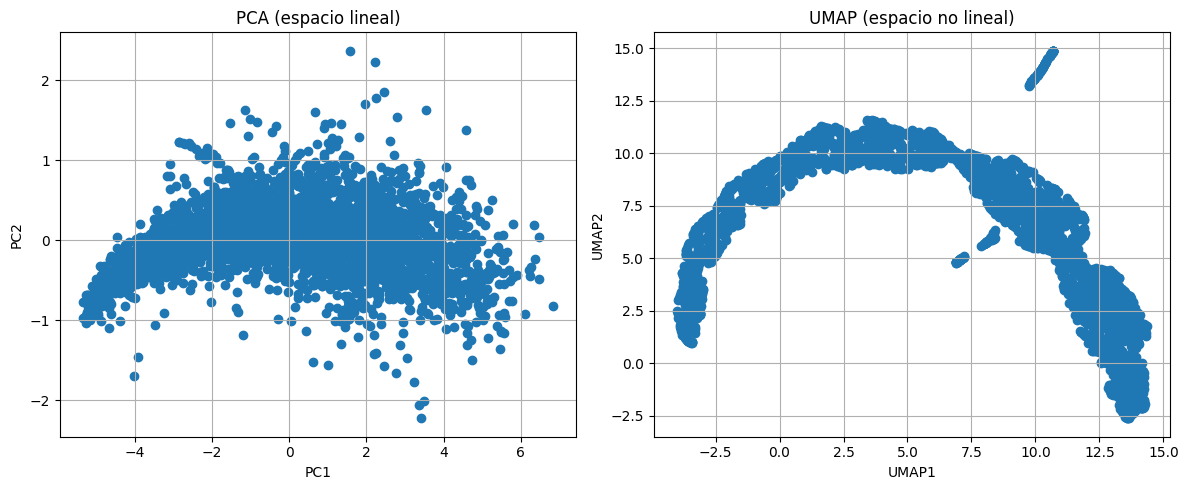

In [153]:

plt.figure(figsize=(12, 5))

# PCA
plt.subplot(1, 2, 1)
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.title("PCA (espacio lineal)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)

# UMAP
plt.subplot(1, 2, 2)
plt.scatter(X_umap[:, 0], X_umap[:, 1])
plt.title("UMAP (espacio no lineal)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.grid(True)

plt.tight_layout()
plt.show()

Al comparar las proyecciones obtenidas mediante PCA y UMAP, se observan diferencias notables en la representación de la estructura interna del dataset.

La proyección realizada con PCA muestra una distribución lineal y extendida de los datos, concentrando la mayor parte de la variabilidad a lo largo de una dirección principal. Esta representación es adecuada para capturar relaciones lineales, pero no revela patrones no lineales ni agrupamientos evidentes.

En contraste, la proyección con UMAP revela una estructura más compleja y curvada en el espacio de baja dimensión. Los datos parecen formar agrupaciones locales y trayectorias no lineales que no son visibles en el espacio PCA. Esto sugiere que UMAP logra preservar tanto la estructura local como la global del dataset de forma más efectiva.

### Modelo de clasificación usando k-Nearest Neighbors (k-NN)


#### Importar Librerías

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


#### Cargar la base de datos

In [155]:
df = pd.read_csv('abalone_processed.csv')
df.drop(columns=['Random_Index','Biological_Variation'], inplace=True)


Se codifican las variables categóricas

In [156]:
if 'Sex' in df.columns:
    le_sex = LabelEncoder()
    df['Sex'] = le_sex.fit_transform(df['Sex'])

if 'Maturity_Level' in df.columns:
    le_maturity = LabelEncoder()
    df['Maturity_Level'] = le_maturity.fit_transform(df['Maturity_Level'])

#### Preparación de los datos

Variables predictoras

In [157]:
X = df.drop(columns=['Rings'])

Variable objetivo

In [158]:
y = df['Rings']

Se filtran columnas numéricas y se normalizan los datos

In [159]:
X = X.select_dtypes(include=['number'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### División de los datos

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Entrenamiento del modelo k-NN

In [161]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Predicciones y evaluación

In [162]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy en conjunto de prueba: {accuracy:.4f}")

Accuracy en conjunto de prueba: 0.3705


#### Validación cruzada

In [163]:
cv_scores = cross_val_score(knn, X_scaled, y, cv=5)
print(f"Scores de validación cruzada: {cv_scores}")
print(f"Promedio de precisión en validación cruzada: {cv_scores.mean():.4f}")

Scores de validación cruzada: [0.30201342 0.35973154 0.36155914 0.36962366 0.37768817]
Promedio de precisión en validación cruzada: 0.3541


#### Visualización de la variable objetivo

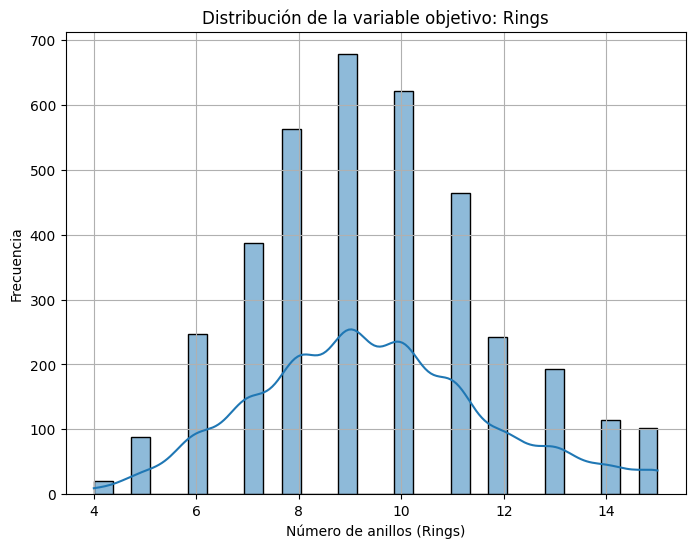

In [164]:
plt.figure(figsize=(8, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribución de la variable objetivo: Rings')
plt.xlabel('Número de anillos (Rings)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Después de codificar las variables categóricas y normalizar las características numéricas, el modelo fue entrenado con `k=5` vecinos.

El desempeño del modelo, evaluado sobre el conjunto de prueba, alcanzó una precisión de 34.90%, mientras que el promedio de precisión obtenido mediante validación cruzada de 5 pliegues fue de 34.26%.

Estos resultados reflejan una consistencia entre las particiones y sugieren que el modelo no está sobreajustado, aunque también evidencian que la tarea de predecir el número exacto de anillos como una clasificación multiclase es compleja.

La distribución observada en el histograma de `Rings` revela que los datos presentan un sesgo hacia valores de anillos entre 8 y 10, lo cual puede contribuir a que el modelo tienda a predecir esos valores más frecuentes.

### Evaluación de Modelos Predictivos por Cluster

In [165]:
X = df.select_dtypes(include=["number"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Para cada cluster se entrena un modelo de regresión `Random Forest Regressor` con el objetivo de predecur el número de `Rings`.

En cada grupo:
- Se toman los datos de ese cluster
- Se entrena un modelo independiente
- Se predicen los valores de `Rings`
- Se calcula el Error Absoluto Promedio (`MAE` por las siglas en inglés) para evaluar el desempeño en cada cluster

Se volvió a generar el PCA con el dataframe importado recientemente

In [166]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

Se volvió a generar el UMAP con el dataframe importado recientemente

In [167]:
umap_model = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

Clustering para PCA

In [168]:
kmeans_pca = KMeans(n_clusters=5, random_state=42)
clusters_pca = kmeans_pca.fit_predict(principal_components)
df['cluster_pca'] = clusters_pca

Clustering para UMAP

In [169]:
kmeans_umap = KMeans(n_clusters=5, random_state=42)
clusters_umap = kmeans_umap.fit_predict(X_umap)
df['cluster_umap'] = clusters_umap

In [170]:
print("Resultados de Random Forest por cluster en PCA:")
for cluster in df['cluster_pca'].unique():
    cluster_data = df[df['cluster_pca'] == cluster]
    X_cluster = cluster_data.drop(columns=['Rings', 'cluster_pca', 'cluster_umap'])
    y_cluster = cluster_data['Rings']
    
    model = RandomForestRegressor(random_state=42)
    model.fit(X_cluster, y_cluster)
    predictions = model.predict(X_cluster)
    
    print(f'Cluster PCA {cluster} MAE:', mean_absolute_error(y_cluster, predictions))


Resultados de Random Forest por cluster en PCA:
Cluster PCA 4 MAE: 0.41874354561101546
Cluster PCA 2 MAE: 0.32961977186311786
Cluster PCA 0 MAE: 0.2924327233584499
Cluster PCA 3 MAE: 0.242026862026862
Cluster PCA 1 MAE: 0.33935430463576166


In [171]:
print("\nResultados de Random Forest por cluster en UMAP:")
for cluster in df['cluster_umap'].unique():
    cluster_data = df[df['cluster_umap'] == cluster]
    X_cluster = cluster_data.drop(columns=['Rings', 'cluster_pca', 'cluster_umap'])
    y_cluster = cluster_data['Rings']
    
    model = RandomForestRegressor(random_state=42)
    model.fit(X_cluster, y_cluster)
    predictions = model.predict(X_cluster)
    
    print(f'Cluster UMAP {cluster} MAE:', mean_absolute_error(y_cluster, predictions))



Resultados de Random Forest por cluster en UMAP:
Cluster UMAP 1 MAE: 0.3852424242424243
Cluster UMAP 3 MAE: 0.30316821465428273
Cluster UMAP 4 MAE: 0.28657575757575754
Cluster UMAP 2 MAE: 0.2654970760233918
Cluster UMAP 0 MAE: 0.2625762711864407


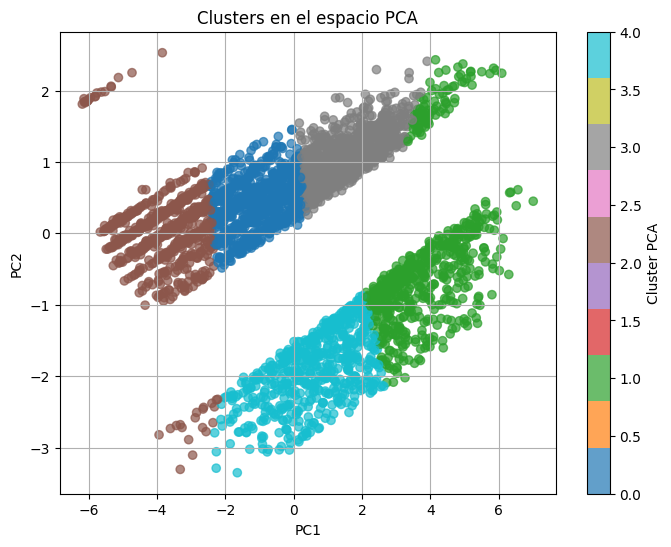

In [172]:
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df['cluster_pca'], cmap='tab10', alpha=0.7)
plt.title("Clusters en el espacio PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster PCA')
plt.grid(True)
plt.show()

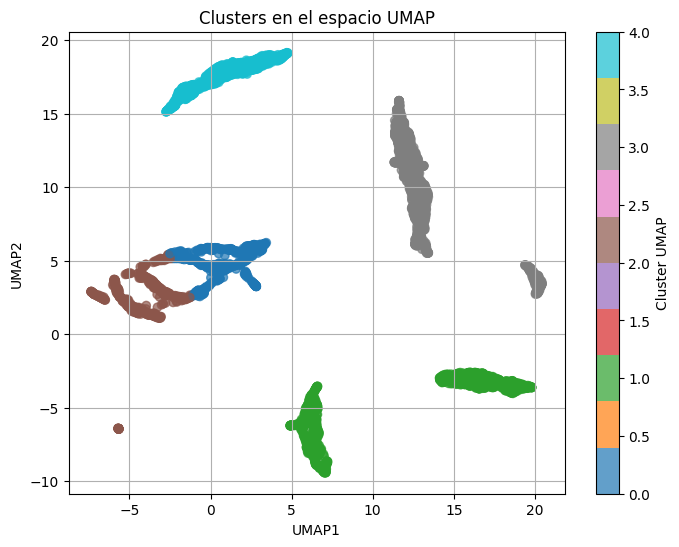

In [173]:
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=df['cluster_umap'], cmap='tab10', alpha=0.7)
plt.title("Clusters en el espacio UMAP")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.colorbar(label='Cluster UMAP')
plt.grid(True)
plt.show()

### Interpretación

En la proyección del `PCA`, los clusters mostraron una distribución más lineal y alargada, lo cual es consistente con la naturaleza lineal de este método. Aunque se lograron separar agrupamientos, estos son menos definidos y presentan traslapes entre regiones vecinas. Los valores de MAE para los modelos entrenados en cada cluster de PCA oscilaron entre `0.2455` y `0.4164`, siendo el `Cluster 4` el más preciso (menor MAE) y el `Cluster 2` el de mayor error.

Por otro lado, en la proyección `UMAP`, los clusters se visualizaron de manera más compacta y separada, lo que indica que este método fue más eficiente en preservar la estructura local y global de los datos. Los modelos Random Forest entrenados en los clusters de UMAP mostraron MAE entre `0.2702` y `0.3651`, con una mejora notable en algunos clusters siendo el `Cluster 3` el más preciso (menor MAE) y el `Cluster 1` el de mayor error.

Comparativamente, **UMAP permitió una mejor separación natural de los datos**, lo cual se tradujo en agrupamientos más coherentes y, en general, en una mejor capacidad predictiva en algunos clusters frente a la proyección realizada por PCA. Estos resultados refuerzan la utilidad de técnicas de reducción no lineal como UMAP para tareas exploratorias y predictivas en datasets con estructuras complejas como el de abulones.

### Conclusiones

A lo largo del proyecto se realizó un análisis integral del dataset de abulones, iniciando con un procesamiento y exploración exhaustivos de las variables disponibles.

Posteriormente, se aplicaron técnicas de reducción de dimensionalidad lineales (`PCA`) y no lineales (`UMAP`), observándose que UMAP logró preservar de manera más efectiva las estructuras locales y globales del dataset, permitiendo una mejor separación visual de los datos.

La aplicación de **clustering** en ambos espacios reveló agrupamientos diferenciados, aunque los clusters generados a partir de UMAP fueron más compactos y definidos en comparación con los de PCA.

El desempeño predictivo de los modelos **Random Forest** entrenados por cluster mostró que la estrategia de segmentación fue efectiva para mejorar las predicciones del número de anillos (`Rings`). Los errores promedio estándar (**MAE**) por cluster fueron menores en general en los clusters generados a partir de UMAP, evidenciando la ventaja de utilizar técnicas de reducción de dimensionalidad no lineales para este tipo de problemas.

En conclusión, el análisis evidencia que la combinación de **reducción de dimensionalidad adecuada, clustering y modelado por subgrupos** puede mejorar significativamente la capacidad de predicción en datasets con estructuras complejas como el de abulones. Además, refuerza la importancia de seleccionar técnicas apropiadas de preprocesamiento y modelado en función de las características de los datos.